# Importação das Bibliotecas

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importação do Banco de Dados

Foi utilizado o arquivo compactado para diminuir o tamanho do arquivo utilizado.

In [14]:
# importar localmente
df_voos = pd.read_csv('DelayedFlights.zip')

In [15]:
df_voos

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [16]:
# Removendo colunas desnecessárias
df_voos = df_voos.drop('Unnamed: 0', axis = 1)

In [19]:
#Dicionário de mapeamento de colunas
mapeamento_colunas = {'Year': 'ANO',
'Month': 'MES',
'DayofMonth': 'DIA_MES',
'DayOfWeek': 'DIA_SEMANA',
'DepTime': 'HORA_PARTIDA_REAL',
'CRSDepTime': 'HORA_PARTIDA_PROGRAMADA',
'ArrTime': 'HORA_CHEGADA_REAL',
'CRSArrTime': 'HORA_CHEGADA_PROGRAMADA',
'UniqueCarrier': 'CODIGO_AVIAO',
'FlightNum': 'NUMERO_VOO',
'TailNum': 'NUMERO_CALDA',
'ActualElapsedTime': 'DURACAO_VOO_REAL',
'CRSElapsedTime': 'DURACAO_VOO_PROGRAMADA',
'AirTime': 'DURACAO_AR_REAL',
'ArrDelay': 'ATRASO_CHEGADA',
'DepDelay': 'ATRASO_PARTIDA',
'Origin': 'ORIGEM',
'Dest': 'DESTINO',
'Distance': 'DISTANCIA',
'TaxiIn': 'TEMPO_PISTA_DECOLAGEM',
'TaxiOut': 'TEMPO_PISTA_POUSO',
'Cancelled': 'CANCELADO',
'CancellationCode': 'MOTIVO_CANCELAMENTO',
'Diverted': 'DESVIADO',
'CarrierDelay': 'TEMPO_ATRASO_COMPANHIA',
'WeatherDelay': 'TEMPO_ATRASO_CLIMA',
'NASDelay': 'TEMPO_ATRASO_SNA',
'SecurityDelay': 'TEMPO_ATRASO_SEGURANCA',
'LateAircraftDelay': 'TEMPO_ATRASO_AERONAVE'}

In [20]:
# Renomear as colunas
df_voos = df_voos.rename(columns=mapeamento_colunas)
df_voos

,ANO,MES,DIA_MES,DIA_SEMANA,HORA_PARTIDA_REAL,HORA_PARTIDA_PROGRAMADA,HORA_CHEGADA_REAL,HORA_CHEGADA_PROGRAMADA,CODIGO_AVIAO,NUMERO_VOO,...,TEMPO_PISTA_DECOLAGEM,TEMPO_PISTA_POUSO,CANCELADO,MOTIVO_CANCELAMENTO,DESVIADO,TEMPO_ATRASO_COMPANHIA,TEMPO_ATRASO_CLIMA,TEMPO_ATRASO_SNA,TEMPO_ATRASO_SEGURANCA,TEMPO_ATRASO_AERONAVE
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [22]:
df_voos.isnull().sum()

ANO                             0
MES                             0
DIA_MES                         0
DIA_SEMANA                      0
HORA_PARTIDA_REAL               0
HORA_PARTIDA_PROGRAMADA         0
HORA_CHEGADA_REAL            7110
HORA_CHEGADA_PROGRAMADA         0
CODIGO_AVIAO                    0
NUMERO_VOO                      0
NUMERO_CALDA                    5
DURACAO_VOO_REAL             8387
DURACAO_VOO_PROGRAMADA        198
DURACAO_AR_REAL              8387
ATRASO_CHEGADA               8387
ATRASO_PARTIDA                  0
ORIGEM                          0
DESTINO                         0
DISTANCIA                       0
TEMPO_PISTA_DECOLAGEM        7110
TEMPO_PISTA_POUSO             455
CANCELADO                       0
MOTIVO_CANCELAMENTO             0
DESVIADO                        0
TEMPO_ATRASO_COMPANHIA     689270
TEMPO_ATRASO_CLIMA         689270
TEMPO_ATRASO_SNA           689270
TEMPO_ATRASO_SEGURANCA     689270
TEMPO_ATRASO_AERONAVE      689270
dtype: int64

In [91]:
df_voos_num = df_voos.select_dtypes(include = np.number)
# Removendo colunas desnecessárias
df_voos_num = df_voos_num.drop(['ANO', 'NUMERO_VOO'], axis = 1)
df_voos_num

,MES,DIA_MES,DIA_SEMANA,HORA_PARTIDA_REAL,HORA_PARTIDA_PROGRAMADA,HORA_CHEGADA_REAL,HORA_CHEGADA_PROGRAMADA,DURACAO_VOO_REAL,DURACAO_VOO_PROGRAMADA,DURACAO_AR_REAL,...,DISTANCIA,TEMPO_PISTA_DECOLAGEM,TEMPO_PISTA_POUSO,CANCELADO,DESVIADO,TEMPO_ATRASO_COMPANHIA,TEMPO_ATRASO_CLIMA,TEMPO_ATRASO_SNA,TEMPO_ATRASO_SEGURANCA,TEMPO_ATRASO_AERONAVE
0,1,3,4,2003.0,1955,2211.0,2225,128.0,150.0,116.0,...,810,4.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,735,1002.0,1000,128.0,145.0,113.0,...,810,5.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,804.0,750,96.0,90.0,76.0,...,515,3.0,17.0,0,0,NaN,NaN,NaN,NaN,NaN
3,1,3,4,1829.0,1755,1959.0,1925,90.0,90.0,77.0,...,515,3.0,10.0,0,0,2.0,0.0,0.0,0.0,32.0
4,1,3,4,1940.0,1915,2121.0,2110,101.0,115.0,87.0,...,688,4.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,12,13,6,1250.0,1220,1617.0,1552,147.0,152.0,120.0,...,906,9.0,18.0,0,0,3.0,0.0,0.0,0.0,22.0
1936754,12,13,6,657.0,600,904.0,749,127.0,109.0,78.0,...,481,15.0,34.0,0,0,0.0,57.0,18.0,0.0,0.0
1936755,12,13,6,1007.0,847,1149.0,1010,162.0,143.0,122.0,...,689,8.0,32.0,0,0,1.0,0.0,19.0,0.0,79.0
1936756,12,13,6,1251.0,1240,1446.0,1437,115.0,117.0,89.0,...,533,13.0,13.0,0,0,NaN,NaN,NaN,NaN,NaN


In [88]:
df_voos_num.corr(method= "spearman")

,ANO,MES,DIA_MES,DIA_SEMANA,HORA_PARTIDA_REAL,HORA_PARTIDA_PROGRAMADA,HORA_CHEGADA_REAL,HORA_CHEGADA_PROGRAMADA,NUMERO_VOO,DURACAO_VOO_REAL,...,DISTANCIA,TEMPO_PISTA_DECOLAGEM,TEMPO_PISTA_POUSO,CANCELADO,DESVIADO,TEMPO_ATRASO_COMPANHIA,TEMPO_ATRASO_CLIMA,TEMPO_ATRASO_SNA,TEMPO_ATRASO_SEGURANCA,TEMPO_ATRASO_AERONAVE
ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MES,NaN,1.000000,0.055862,0.001030,-0.005988,-0.007329,-0.001085,0.000289,-0.006576,0.000417,...,0.003275,0.010495,-0.009276,0.026614,0.005928,0.002823,0.009171,0.015947,-0.007556,-0.006786
DIA_MES,NaN,0.055862,1.000000,0.017058,0.001339,0.000960,0.001500,0.000875,-0.004041,-0.000837,...,0.000139,-0.004128,-0.001991,0.004654,0.001174,-0.000205,0.008501,-0.001747,-0.003127,0.005583
DIA_SEMANA,NaN,0.001030,0.017058,1.000000,0.022789,0.025224,0.015966,0.019113,-0.011356,-0.000839,...,0.005797,0.003758,-0.017326,0.000029,-0.001367,0.023688,-0.000118,-0.011808,0.006559,0.000793
HORA_PARTIDA_REAL,NaN,-0.005988,0.001339,0.022789,1.000000,0.937528,0.675941,0.818704,-0.026811,-0.048407,...,-0.045776,-0.027772,0.006944,0.002863,-0.004354,-0.097120,0.010062,-0.062680,-0.019035,0.239921
HORA_PARTIDA_PROGRAMADA,NaN,-0.007329,0.000960,0.025224,0.937528,1.000000,0.635092,0.826948,-0.049004,-0.048255,...,-0.035294,-0.043607,-0.009511,0.000367,-0.008661,-0.105514,-0.000380,-0.075794,-0.015679,0.220627
HORA_CHEGADA_REAL,NaN,-0.001085,0.001500,0.015966,0.675941,0.635092,1.000000,0.774522,-0.038382,0.045337,...,0.042830,0.036011,0.025987,NaN,-0.002486,-0.111502,-0.009207,0.016565,-0.010602,0.127067
HORA_CHEGADA_PROGRAMADA,NaN,0.000289,0.000875,0.019113,0.818704,0.826948,0.774522,1.000000,-0.073971,0.075010,...,0.093600,0.004195,0.027376,0.000206,0.000889,-0.108750,0.003994,-0.035148,-0.013233,0.190990
NUMERO_VOO,NaN,-0.006576,-0.004041,-0.011356,-0.026811,-0.049004,-0.038382,-0.073971,1.000000,-0.310810,...,-0.358645,-0.040458,0.010925,0.008415,-0.003920,0.017010,0.073610,-0.045384,-0.010677,-0.092958
DURACAO_VOO_REAL,NaN,0.000417,-0.000837,-0.000839,-0.048407,-0.048255,0.045337,0.075010,-0.310810,1.000000,...,0.939548,0.245035,0.316461,NaN,NaN,0.004082,0.029014,0.297614,0.003773,-0.069284


Text(0.5, 1.0, 'Correlação de spearman')

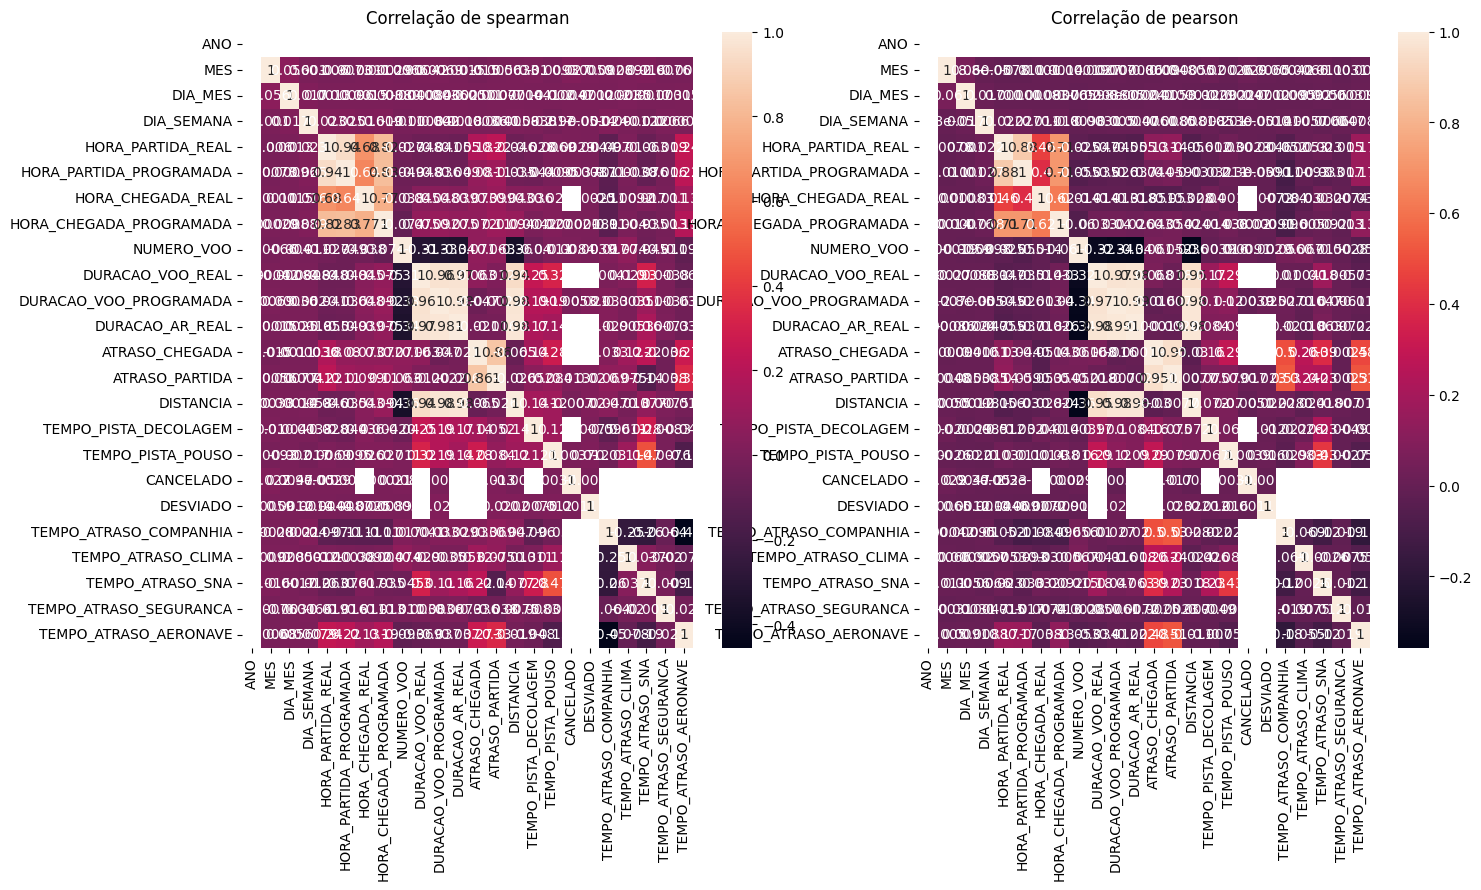

In [89]:
fig, ax = plt.subplots(1,2, figsize = ( 16,8))
sns.heatmap(df_voos_num.corr(method = "spearman"), ax = ax[0], annot = True)
sns.heatmap(df_voos_num.corr(method = "pearson"), ax = ax[1], annot = True)
ax[1].set_title("Correlação de pearson")
ax[0].set_title("Correlação de spearman")

In [86]:
#narrow in on the issue
cancel2 = cancel[['CANCELADO','ATRASO_CHEGADA','ATRASO_PARTIDA', 'DURACAO_VOO_REAL']]
cancel2=cancel2[cancel2['CANCELADO']==1] #  select only cancelled flights

#explore cancelation data
print(cancel2)
print(cancel2.isna().sum()) #sum of NA's

         CANCELADO  ATRASO_CHEGADA  ATRASO_PARTIDA  DURACAO_VOO_REAL
1542406          1             NaN           122.0               NaN
1546593          1             NaN            28.0               NaN
1547161          1             NaN            10.0               NaN
1547178          1             NaN            18.0               NaN
1548271          1             NaN           118.0               NaN
...            ...             ...             ...               ...
1934590          1             NaN            42.0               NaN
1935491          1             NaN             9.0               NaN
1935651          1             NaN            12.0               NaN
1935876          1             NaN            31.0               NaN
1936470          1             NaN            33.0               NaN

[633 rows x 4 columns]
CANCELADO             0
ATRASO_CHEGADA      633
ATRASO_PARTIDA        0
DURACAO_VOO_REAL    633
dtype: int64


In [57]:
# Criando um df só com voos cancelados
df_cancelados = df_voos[df_voos['CANCELADO']==1]

df_cancelados

,ANO,MES,DIA_MES,DIA_SEMANA,HORA_PARTIDA_REAL,HORA_PARTIDA_PROGRAMADA,HORA_CHEGADA_REAL,HORA_CHEGADA_PROGRAMADA,CODIGO_AVIAO,NUMERO_VOO,...,TEMPO_PISTA_DECOLAGEM,TEMPO_PISTA_POUSO,CANCELADO,MOTIVO_CANCELAMENTO,DESVIADO,TEMPO_ATRASO_COMPANHIA,TEMPO_ATRASO_CLIMA,TEMPO_ATRASO_SNA,TEMPO_ATRASO_SEGURANCA,TEMPO_ATRASO_AERONAVE
1542406,2008,10,27,1,1622.0,1420,NaN,1520,WN,27,...,NaN,19.0,1,A,0,NaN,NaN,NaN,NaN,NaN
1546593,2008,10,25,6,1323.0,1255,NaN,1442,XE,2347,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
1547161,2008,10,22,3,1825.0,1815,NaN,1927,XE,2819,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
1547178,2008,10,22,3,1733.0,1715,NaN,1818,XE,2890,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
1548271,2008,10,15,3,1943.0,1745,NaN,1857,XE,2117,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934590,2008,12,7,7,1526.0,1444,NaN,1654,DL,1743,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
1935491,2008,12,10,3,1431.0,1422,NaN,1527,DL,1405,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
1935651,2008,12,10,3,1459.0,1447,NaN,1650,DL,1706,...,NaN,37.0,1,A,0,NaN,NaN,NaN,NaN,NaN
1935876,2008,12,11,4,1026.0,955,NaN,1219,DL,892,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


# Análise Exploratória dos dados

In [71]:
voos_mes = df_voos['MES'].value_counts(dropna=False)
voos_mes

MES
12    203385
6     200914
3     200842
2     189534
1     183527
7     182945
8     162648
4     155264
5     153072
11    105563
10    103525
9      95539
Name: count, dtype: int64

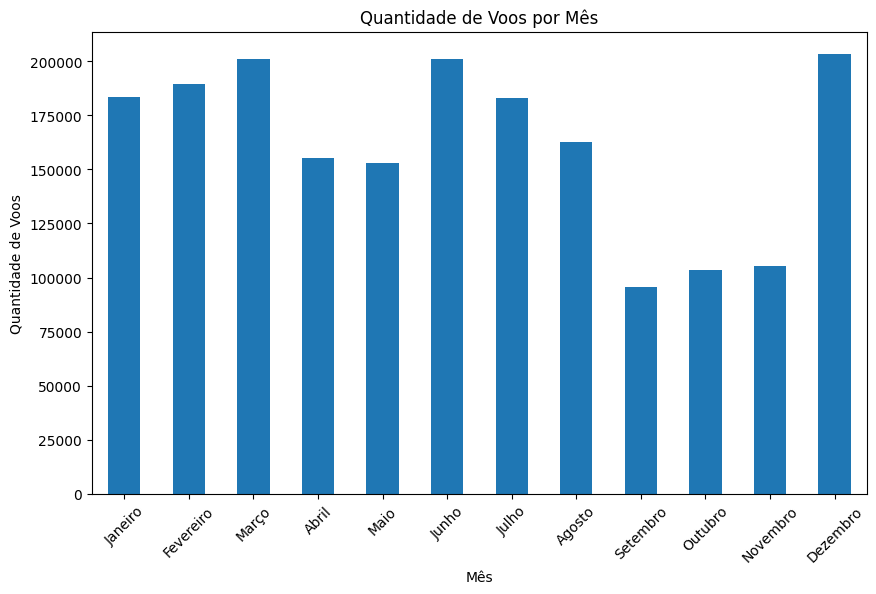

In [76]:
# Mapeamento de números para nomes dos meses
mapa_meses = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho',
              7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

contagem_por_mes = df_voos['MES'].value_counts().sort_index()

# Substituir os números pelos nomes dos meses
contagem_por_mes.index = contagem_por_mes.index.map(mapa_meses)

fig, ax = plt.subplots(figsize=(10, 6))
contagem_por_mes.plot(kind='bar')

ax.set_xlabel('Mês')
ax.set_ylabel('Quantidade de Voos')
ax.set_title('Quantidade de Voos por Mês')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# Exibir o gráfico
plt.show()

Os meses que possem a maior quantidade de voos programados são dezembro, junho e março.

## Análise descritiva Cancelados

Analisaremos os dias da semana que mais tem cancelamentos de voos.

In [36]:
# Mapeamento de números para nomes dos dias da semana
mapa_dias = {1: 'Segunda', 2: 'Terça', 3: 'Quarta', 4: 'Quinta', 5: 'Sexta', 6: 'Sábado', 7: 'Domingo'}

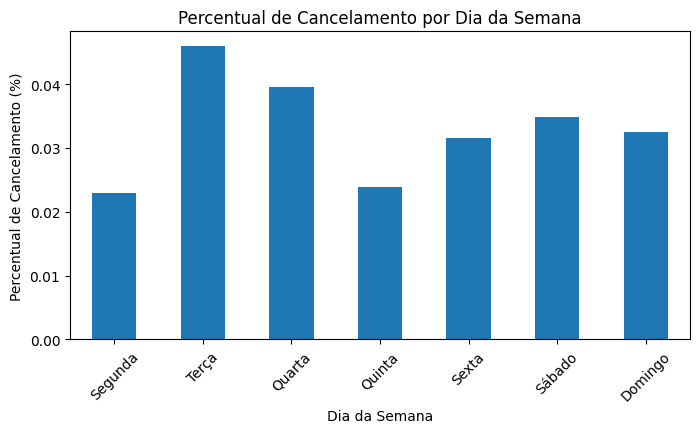

In [46]:
dias_cancelados = df_cancelados['CANCELADO'].groupby(df_voos['DIA_SEMANA']).count()
total_dias = df_voos['CANCELADO'].groupby(df_voos['DIA_SEMANA']).count()
percentual_cancelamento = (dias_cancelados/total_dias)*100

fig, ax = plt.subplots(figsize = (8,4))
# Substituir os números pelos nomes
percentual_cancelamento.index = percentual_cancelamento.index.map(mapa_dias)  
percentual_cancelamento.plot(kind='bar', ax=ax)
ax.set_ylabel('Percentual de Cancelamento (%)')
ax.set_xlabel('Dia da Semana')
ax.set_title('Percentual de Cancelamento por Dia da Semana')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

Segunda tem o menor percentual de voos cancelados e terça o maior.

Analisaremos os horários de partida programados que mais tem cancelamentos de voos.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


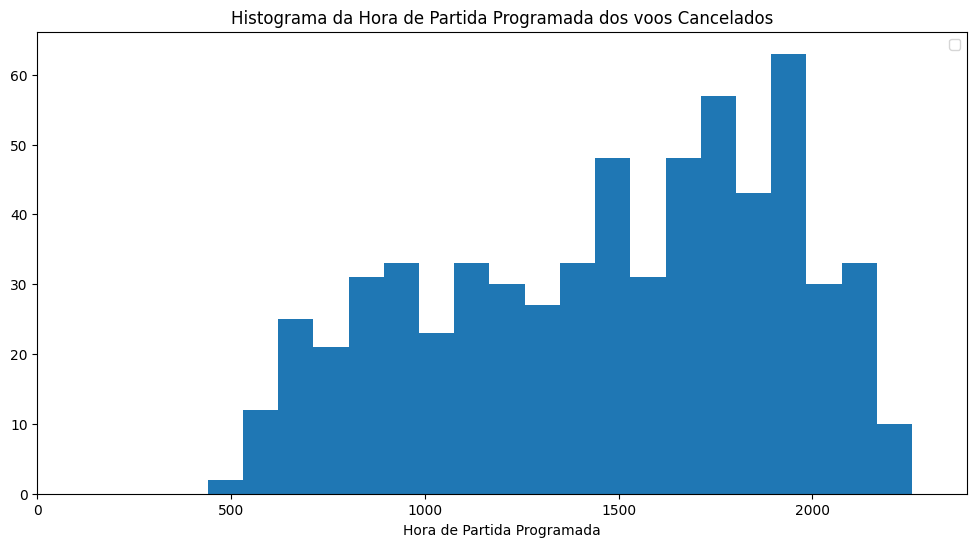

In [63]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df_cancelados['HORA_PARTIDA_PROGRAMADA']], bins=20)

ax.set_xlim(0,2400)

ax.set_xlabel('Hora de Partida Programada')
ax.set_title('Histograma da Hora de Partida Programada dos voos Cancelados')

plt.legend()
plt.show()

Os maiores cancelamentos estão distribuidos entre 18:00 e 20:00.

NameError: name 'cancelados' is not defined

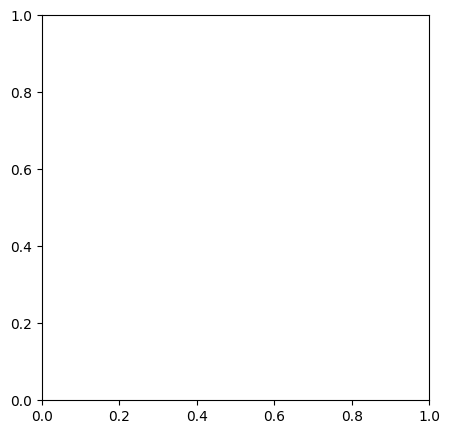

In [10]:
fig, ax = plt.subplots(figsize = (5,5))

ax.hist([df_voos['CRSDepTime'], cancelados['CRSDepTime']], bins = 10, 
        label = ['Todos', 'Cancelados'])
ax.set_xlabel('Hora de Partida Programada')
ax.set_title('Histograma da Hora de Partida Programada')

plt.legend()
plt.show()